In [305]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plot 

# File to Load

spotify_data_load = Path("Resources/spotify_songs .csv")

# Read Data File and store into Pandas DataFrames
spotify_data= pd.read_csv(spotify_data_load)
spotify_data_drop = spotify_data.drop(columns =['track_id','track_album_id', 'playlist_id', 'track_album_name',
                                        'danceability', 'energy', 'mode', 'speechiness', 'acousticness',
                                        'instrumentalness', 'liveness', 'valence'])
# Show DateFrame
spotify_data_drop.head(20)

,track_name,track_artist,track_popularity,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,key,loudness,tempo,duration_ms
0,At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981%,174.794%,182400
1,(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889%,128.091%,125507
2,Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295%,119.117%,142547
3,At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881%,174.610%,179893
4,Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741%,136.837%,176333
5,Green Onions,Booker T. & the M.G.'s,64,1962,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,10,-8.741%,136.837%,176333
6,Christmas (Baby Please Come Home),Darlene Love,73,1963,Christmas Soul,r&b,neo soul,3,-7.146%,126.322%,166453
7,Winter Wonderland,Aretha Franklin,45,1964,Christmas Soul,r&b,neo soul,7,-8.026%,106.274%,132107
8,Turn! Turn! Turn! (To Everything There Is a Se...,The Byrds,42,1965,Classic Rock,rock,classic rock,2,-8.170%,124.594%,229533
9,Que Bueno Baila Usted,Beny Moré,40,1965,Cuban vibes only,r&b,urban contemporary,5,-9.712%,172.230%,196933


In [306]:
#Check 
spotify_data_drop.dtypes

track_name                   object
track_artist                 object
track_popularity              int64
track_album_release_date      int64
playlist_name                object
playlist_genre               object
playlist_subgenre            object
key                           int64
loudness                    float64
tempo                       float64
duration_ms                   int64
dtype: object

In [362]:
#Make it pretty 
spotify_df = spotify_data_drop.rename(columns={"track_name": "Track Name", "track_artist": "Artist", "track_popularity": "Popularity",
                          "track_album_release_date": "Release Date", "playlist_name": "Playlist Name",
                          "playlist_genre": "Genre", "playlist_subgenre": "Subgenre", "key": "Key",
                          "loudness": "Loudness","tempo": "Tempo", "duration_ms": "Duration (ms)"})
spotify_df = spotify_df.set_index(["Track Name"])
spotify_df['Tempo'] =spotify_df['Tempo'].map('{:.3f}'.format)
spotify_df['Loudness'] =spotify_df['Loudness'].map('{:.3f}'.format)

#Print data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981,174.794,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889,128.091,125507
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295,119.117,142547
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881,174.610,179893
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741,136.837,176333
...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118,142.665,407333
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999,142.829,346987
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404,156.308,235107


In [308]:
#Define the number assignments of the key in letter form. 
#Create new column for the letter key
def key_assign(key):
    if key == 0:
        return("C")
    elif key == 1:
        return('C#')
    elif key == 2:
        return('D')
    elif key == 3:
        return('D#')
    elif key == 4:
        return('E')
    elif key == 5:
        return("F")
    elif key == 6:
        return('F#')
    elif key == 7:
        return('G')
    elif key == 8:
        return('G#')
    elif key == 9:
        return('A')
    elif key == 10:
        return('A#')
    elif key == 11:
        return('B')
    else:
        return('No Key Detected')

spotify_df["Key Assignment"] = spotify_df['Key'].apply(key_assign)

#Display new data frame
spotify_df

,Artist,Popularity,Release Date,Playlist Name,Genre,Subgenre,Key,Loudness,Tempo,Duration (ms),Key Assignment
Track Name,,,,,,,,,,,
At Last - Single Version,Etta James,25,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,-9.981%,174.794%,182400,F
(What A) Wonderful World - Remastered,Sam Cooke,13,1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,-9.889%,128.091%,125507,B
Jingle Bells,Ella Fitzgerald,11,1960,Christmas Soul,r&b,neo soul,7,-6.295%,119.117%,142547,G
At Last - Single Version,Etta James,15,1960,Sexy Soul 2020,r&b,neo soul,5,-9.881%,174.610%,179893,F
Green Onions,Booker T. & the M.G.'s,64,1962,Supernatural Classic Rock,rock,classic rock,10,-8.741%,136.837%,176333,A#
...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,1978,This Is Scorpions,rock,hard rock,3,-6.118%,142.665%,407333,D#
Wavelength - Remastered,Van Morrison,44,1978,Classic Rock Retrogamer,rock,classic rock,0,-6.999%,142.829%,346987,C
Der Mussolini - 1998 - Remaster,DAF,2,1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,-9.404%,156.308%,235107,F#


In [341]:
#Categorize and Establish Bins for Popularity
size_bins = (0, 30, 60, 90, 100)
labels = ['Least Popular (<30)', 'Low to Mid Popular (30-59)',
          'Mid to High Popular (60-89)','Most Popular (90-100)'] 

spotify_df["Popularity Sectors"] = pd.cut(spotify_df["Popularity"],size_bins, labels=labels)

#Organize Columns
spotify_df =spotify_df.reindex(columns=['Artist', 'Popularity', 'Popularity Sectors', 'Release Date',
                                       'Playlist Name', 'Genre', 'Subgenre', 'Key', 'Key Assignment',
                                       'Loudness', 'Tempo', 'Duration (ms)'])
#Print data frame
spotify_df

,Artist,Popularity,Popularity Sectors,Release Date,Playlist Name,Genre,Subgenre,Key,Key Assignment,Loudness,Tempo,Duration (ms)
Track Name,,,,,,,,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,5,F,-9.981%,174.794%,182400
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),1960,The 1950s/1960s/1970s/1980s/1990s/2000s/2010s ...,r&b,urban contemporary,11,B,-9.889%,128.091%,125507
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),1960,Christmas Soul,r&b,neo soul,7,G,-6.295%,119.117%,142547
At Last - Single Version,Etta James,15,Least Popular (<30),1960,Sexy Soul 2020,r&b,neo soul,5,F,-9.881%,174.610%,179893
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),1962,Supernatural Classic Rock,rock,classic rock,10,A#,-8.741%,136.837%,176333
...,...,...,...,...,...,...,...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),1978,This Is Scorpions,rock,hard rock,3,D#,-6.118%,142.665%,407333
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),1978,Classic Rock Retrogamer,rock,classic rock,0,C,-6.999%,142.829%,346987
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),1981,Gothic / Industrial / Mittelalter / EBM / Futu...,pop,electropop,6,F#,-9.404%,156.308%,235107


In [342]:
#Key Data
#Drop un-needed columns
key_df = spotify_df.drop(columns={'Release Date', 'Playlist Name', 'Genre',
                         'Subgenre', 'Loudness', 'Tempo', 'Duration (ms)'})
#Print data frame
key_df

,Artist,Popularity,Popularity Sectors,Key,Key Assignment
Track Name,,,,,
At Last - Single Version,Etta James,25,Least Popular (<30),5,F
(What A) Wonderful World - Remastered,Sam Cooke,13,Least Popular (<30),11,B
Jingle Bells,Ella Fitzgerald,11,Least Popular (<30),7,G
At Last - Single Version,Etta James,15,Least Popular (<30),5,F
Green Onions,Booker T. & the M.G.'s,64,Mid to High Popular (60-89),10,A#
...,...,...,...,...,...
Top Of The Bill - Live,Scorpions,2,Least Popular (<30),3,D#
Wavelength - Remastered,Van Morrison,44,Low to Mid Popular (30-59),0,C
Der Mussolini - 1998 - Remaster,DAF,2,Least Popular (<30),6,F#


In [343]:
#Group and Count each letter in Key Assignment
key_group = key_df.groupby(['Key Assignment']).size()
key_group

Key Assignment
A     3027
A#    2273
B     2996
C     3454
C#    4010
D     2827
D#     913
E     2201
F     2680
F#    2670
G     3352
G#    2430
dtype: int64

In [344]:
key_group_2 = key_df.groupby(['Popularity Sectors'])['Key Assignment'].value_counts()
key_group_2 =pd.DataFrame(key_group_2)
key_group_2 = key_group_2.sort_values('Key Assignment')

key_group_2

count
Popularity Sectors          Key Assignment       
Mid to High Popular (60-89) A                 811
Least Popular (<30)         A                 620
Most Popular (90-100)       A                  19
Low to Mid Popular (30-59)  A                1293
                            A#                973
Mid to High Popular (60-89) A#                580
Most Popular (90-100)       A#                 38
Least Popular (<30)         A#                476
Mid to High Popular (60-89) B                 802
Low to Mid Popular (30-59)  B                1259
Least Popular (<30)         B                 644
Most Popular (90-100)       B                  22
Least Popular (<30)         C                 784
Mid to High Popular (60-89) C                 969
Low to Mid Popular (30-59)  C                1452
Most Popular (90-100)       C                  10
Least Popular (<30)         C#                886
Low to Mid Popular (30-59)  C#               1696
Most Popular (90-100)       C#                 32
Mid to High Popular (60-89) C#               1087
                            D                 711
Most Popular (90-100)       D                  28
Least Popular (<30)         D                 663
Low to Mid Popular (30-59)  D                1183
Mid to High Popular (60-89) D#                224
Low to Mid Popular (30-59)  D#                404
Most Popular (90-100)       D#                  0
Least Popular (<30)         D#                216
                            E                 493
Most Popular (90-100)       E                   7
Mid to High Popular (60-89) E                 575
Low to Mid Popular (30-59)  E                 924
                            F                1133
Mid to High Popular (60-89) F                 724
Least Popular (<30)         F                 583
Most Popular (90-100)       F                   8
Mid to High Popular (60-89) F#                704
Low to Mid Popular (30-59)  F#               1113
Most Popular (90-100)       F#                 33
Least Popular (<30)         F#                609
Low to Mid Popular (30-59)  G                1383
Mid to High Popular (60-89) G                 792
Least Popular (<30)         G                 858
Most Popular (90-100)       G                  44
Least Popular (<30)         G#                473
Low to Mid Popular (30-59)  G#               1070
Most Popular (90-100)       G#                 11
Mid to High Popular (60-89) G#                711

In [345]:
key_group_3=key_group_2.loc['Low to Mid Popular (30-59)']
key_group_3= (key_group_3['count']) / (key_group_3['count'].sum()) * 100
key_group_3


Key Assignment
A     9.314%
A#    7.009%
B     9.069%
C    10.459%
C#   12.216%
D     8.521%
D#    2.910%
E     6.656%
F     8.161%
F#    8.017%
G     9.962%
G#    7.707%
Name: count, dtype: float64

In [346]:
key_group_4=key_group_2.loc['Mid to High Popular (60-89)']
key_group_4= (key_group_4['count']) / (key_group_4['count'].sum()) * 100
key_group_4

Key Assignment
A     9.333%
A#    6.674%
B     9.229%
C    11.151%
C#   12.509%
D     8.182%
D#    2.578%
E     6.617%
F     8.331%
F#    8.101%
G     9.114%
G#    8.182%
Name: count, dtype: float64

In [347]:
key_group_5=key_group_2.loc['Least Popular (<30)']
key_group_5= (key_group_5['count']) / (key_group_5['count'].sum()) * 100
key_group_5

Key Assignment
A     8.487%
A#    6.516%
B     8.816%
C    10.732%
C#   12.129%
D     9.076%
D#    2.957%
E     6.749%
F     7.981%
F#    8.337%
G    11.745%
G#    6.475%
Name: count, dtype: float64

In [348]:
key_group_6=key_group_2.loc['Most Popular (90-100)']
key_group_6= (key_group_6['count']) / (key_group_6['count'].sum()) * 100
key_group_6

Key Assignment
A     7.540%
A#   15.079%
B     8.730%
C     3.968%
C#   12.698%
D    11.111%
D#    0.000%
E     2.778%
F     3.175%
F#   13.095%
G    17.460%
G#    4.365%
Name: count, dtype: float64

In [352]:
key_popularity = pd.DataFrame({"Most Popular (90-100)": key_group_6,
                       "Mid to High Popular (60-89)": key_group_4,
                       "Low to Mid Popular ( 30-59)": key_group_3,
                       "Least Popular (<30)": key_group_5})   
pd.options.display.float_format = '{:.3f}%'.format

key_popularity.head()

,Most Popular (90-100),Mid to High Popular (60-89),Low to Mid Popular ( 30-59),Least Popular (<30)
Key Assignment,,,,
A,7.540%,9.333%,9.314%,8.487%
A#,15.079%,6.674%,7.009%,6.516%
B,8.730%,9.229%,9.069%,8.816%
C,3.968%,11.151%,10.459%,10.732%
C#,12.698%,12.509%,12.216%,12.129%


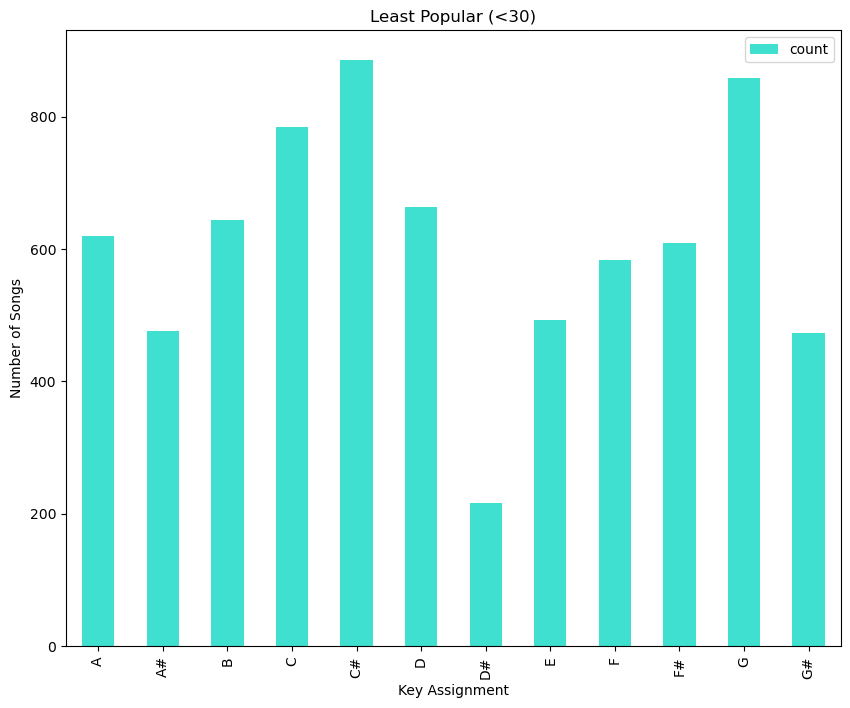

In [353]:
bar_5= key_group_2.loc['Least Popular (<30)']
bar_5.plot(kind='bar', figsize=(10,8), title= 'Least Popular (<30)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='turquoise')
plt.show()

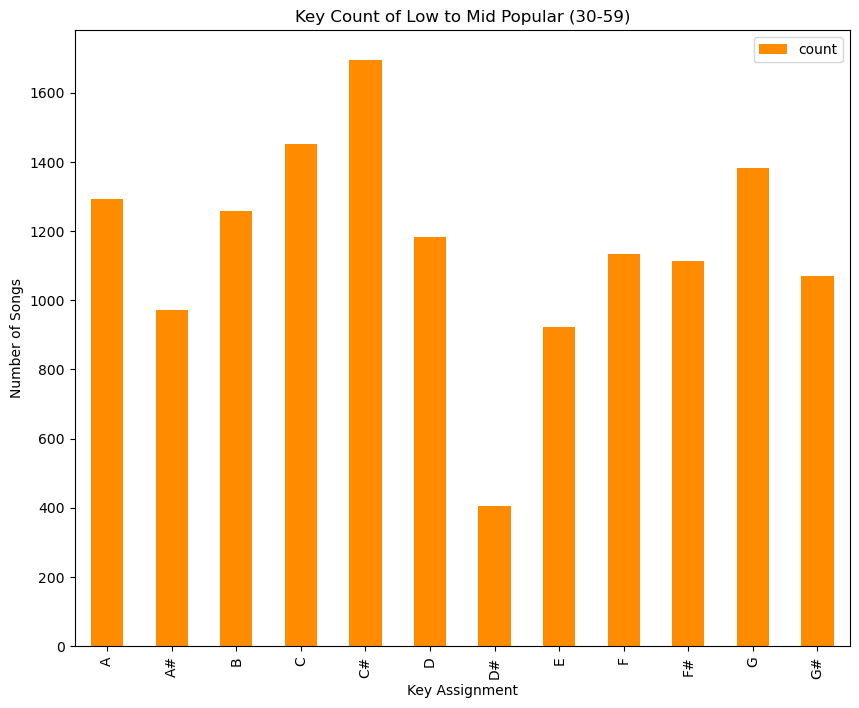

In [355]:
bar_4= key_group_2.loc['Low to Mid Popular (30-59)']
bar_4.plot(kind='bar', figsize=(10,8), title= 'Key Count of Low to Mid Popular (30-59)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='darkorange')
plt.show()

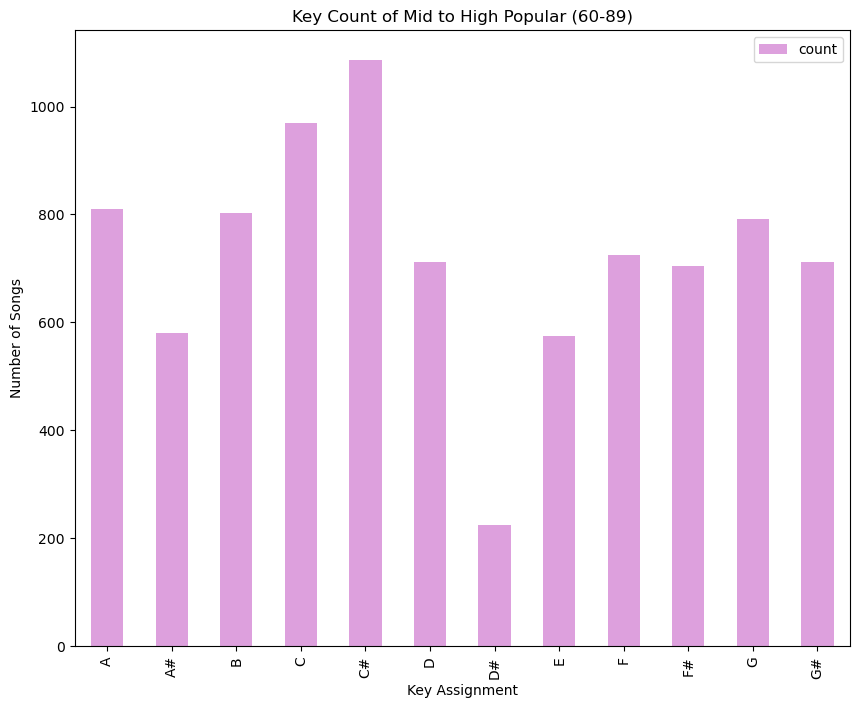

In [357]:
bar_2= key_group_2.loc['Mid to High Popular (60-89)']
bar_2.plot(kind='bar', figsize=(10,8), title= 'Key Count of Mid to High Popular (60-89)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='plum')
plt.show()

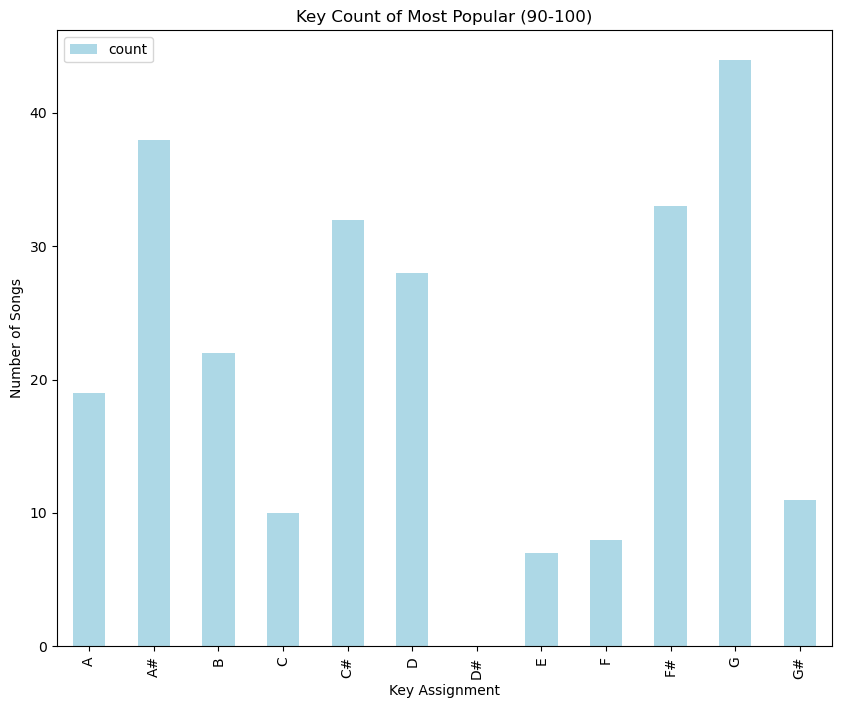

In [356]:
bar_1= key_group_2.loc['Most Popular (90-100)']
bar_1.plot(kind='bar', figsize=(10,8), title= 'Key Count of Most Popular (90-100)',
           xlabel='Key Assignment', ylabel="Number of Songs", color='lightblue')
plt.show()

In [337]:
from scipy.stats import linregress


def calcLinearRegression(x_value, y_value):
    #x_string = print(f"{dataframe}['{x_value}']")
    x_values =  x_value
    y_values = y_value
    plotx = min(x_value) + 10
    ploty = min(y_value)
    #print(plotx)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #print(line_eq)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(plotx,ploty),fontsize=15,color="red")
    print(f"The r value is: {rvalue**2}")


The r value is: 2.8923561114466977e-05


TypeError: 'str' object is not callable

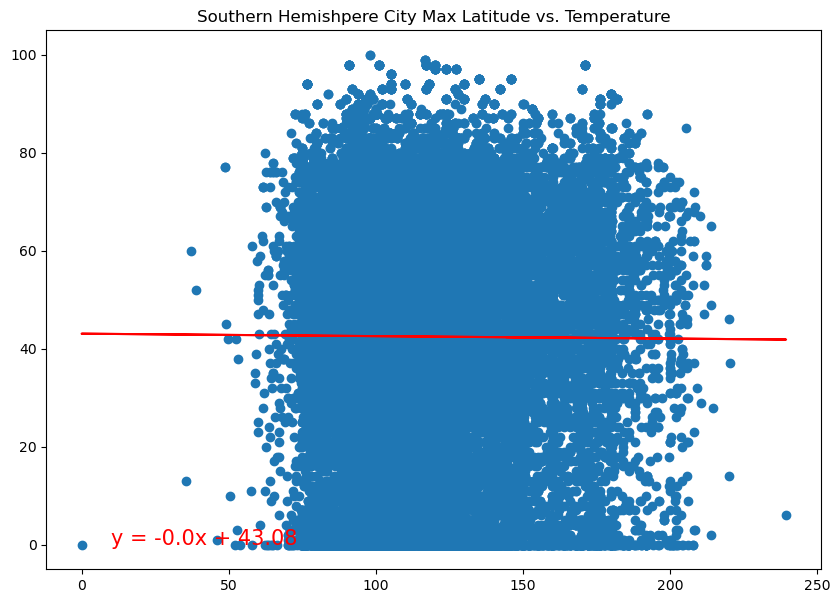

In [340]:

#To Call the function:
# Linear regression on Southern Hemisphere
x_value = spotify_df['Tempo']
y_value = spotify_df['Popularity']
#calcLinearRegression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
calcLinearRegression(x_value, y_value)
plt.scatter(x_value, y_value, marker="o")  # could move this to the function
# Incorporate the other graph properties
plt.title("Southern Hemishpere City Max Latitude vs. Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()